#### This notebook is created on Kaggle, you can import this notebook and run it there without having any trouble.

author: [@danielprasetyo7952](https://github.com/danielprasetyo7952)

In [1]:
!nvidia-smi

Fri Jul  7 12:03:17 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (2 CPUs, 15.6 GB RAM, 4813.6/8062.4 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

## Inference with Pre-trained COCO Model

In [ ]:
# prepare the dataset here

# in my case, I use roboflow

## Custom Training

In [13]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=200 imgsz=800 plots=True

/kaggle/working
100%|███████████████████████████████████████| 21.5M/21.5M [00:00<00:00, 143MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/kaggle/working/datasets/charDetection-3/data.yaml, epochs=200, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_ma

In [14]:
!ls {HOME}/runs/detect/train/

F1_curve.png					  train_batch0.jpg
PR_curve.png					  train_batch1.jpg
P_curve.png					  train_batch2.jpg
R_curve.png					  train_batch21470.jpg
args.yaml					  train_batch21471.jpg
confusion_matrix.png				  train_batch21472.jpg
events.out.tfevents.1688731494.592acebc30a7.88.0  val_batch0_labels.jpg
results.csv					  val_batch0_pred.jpg
results.png					  weights


/kaggle/working


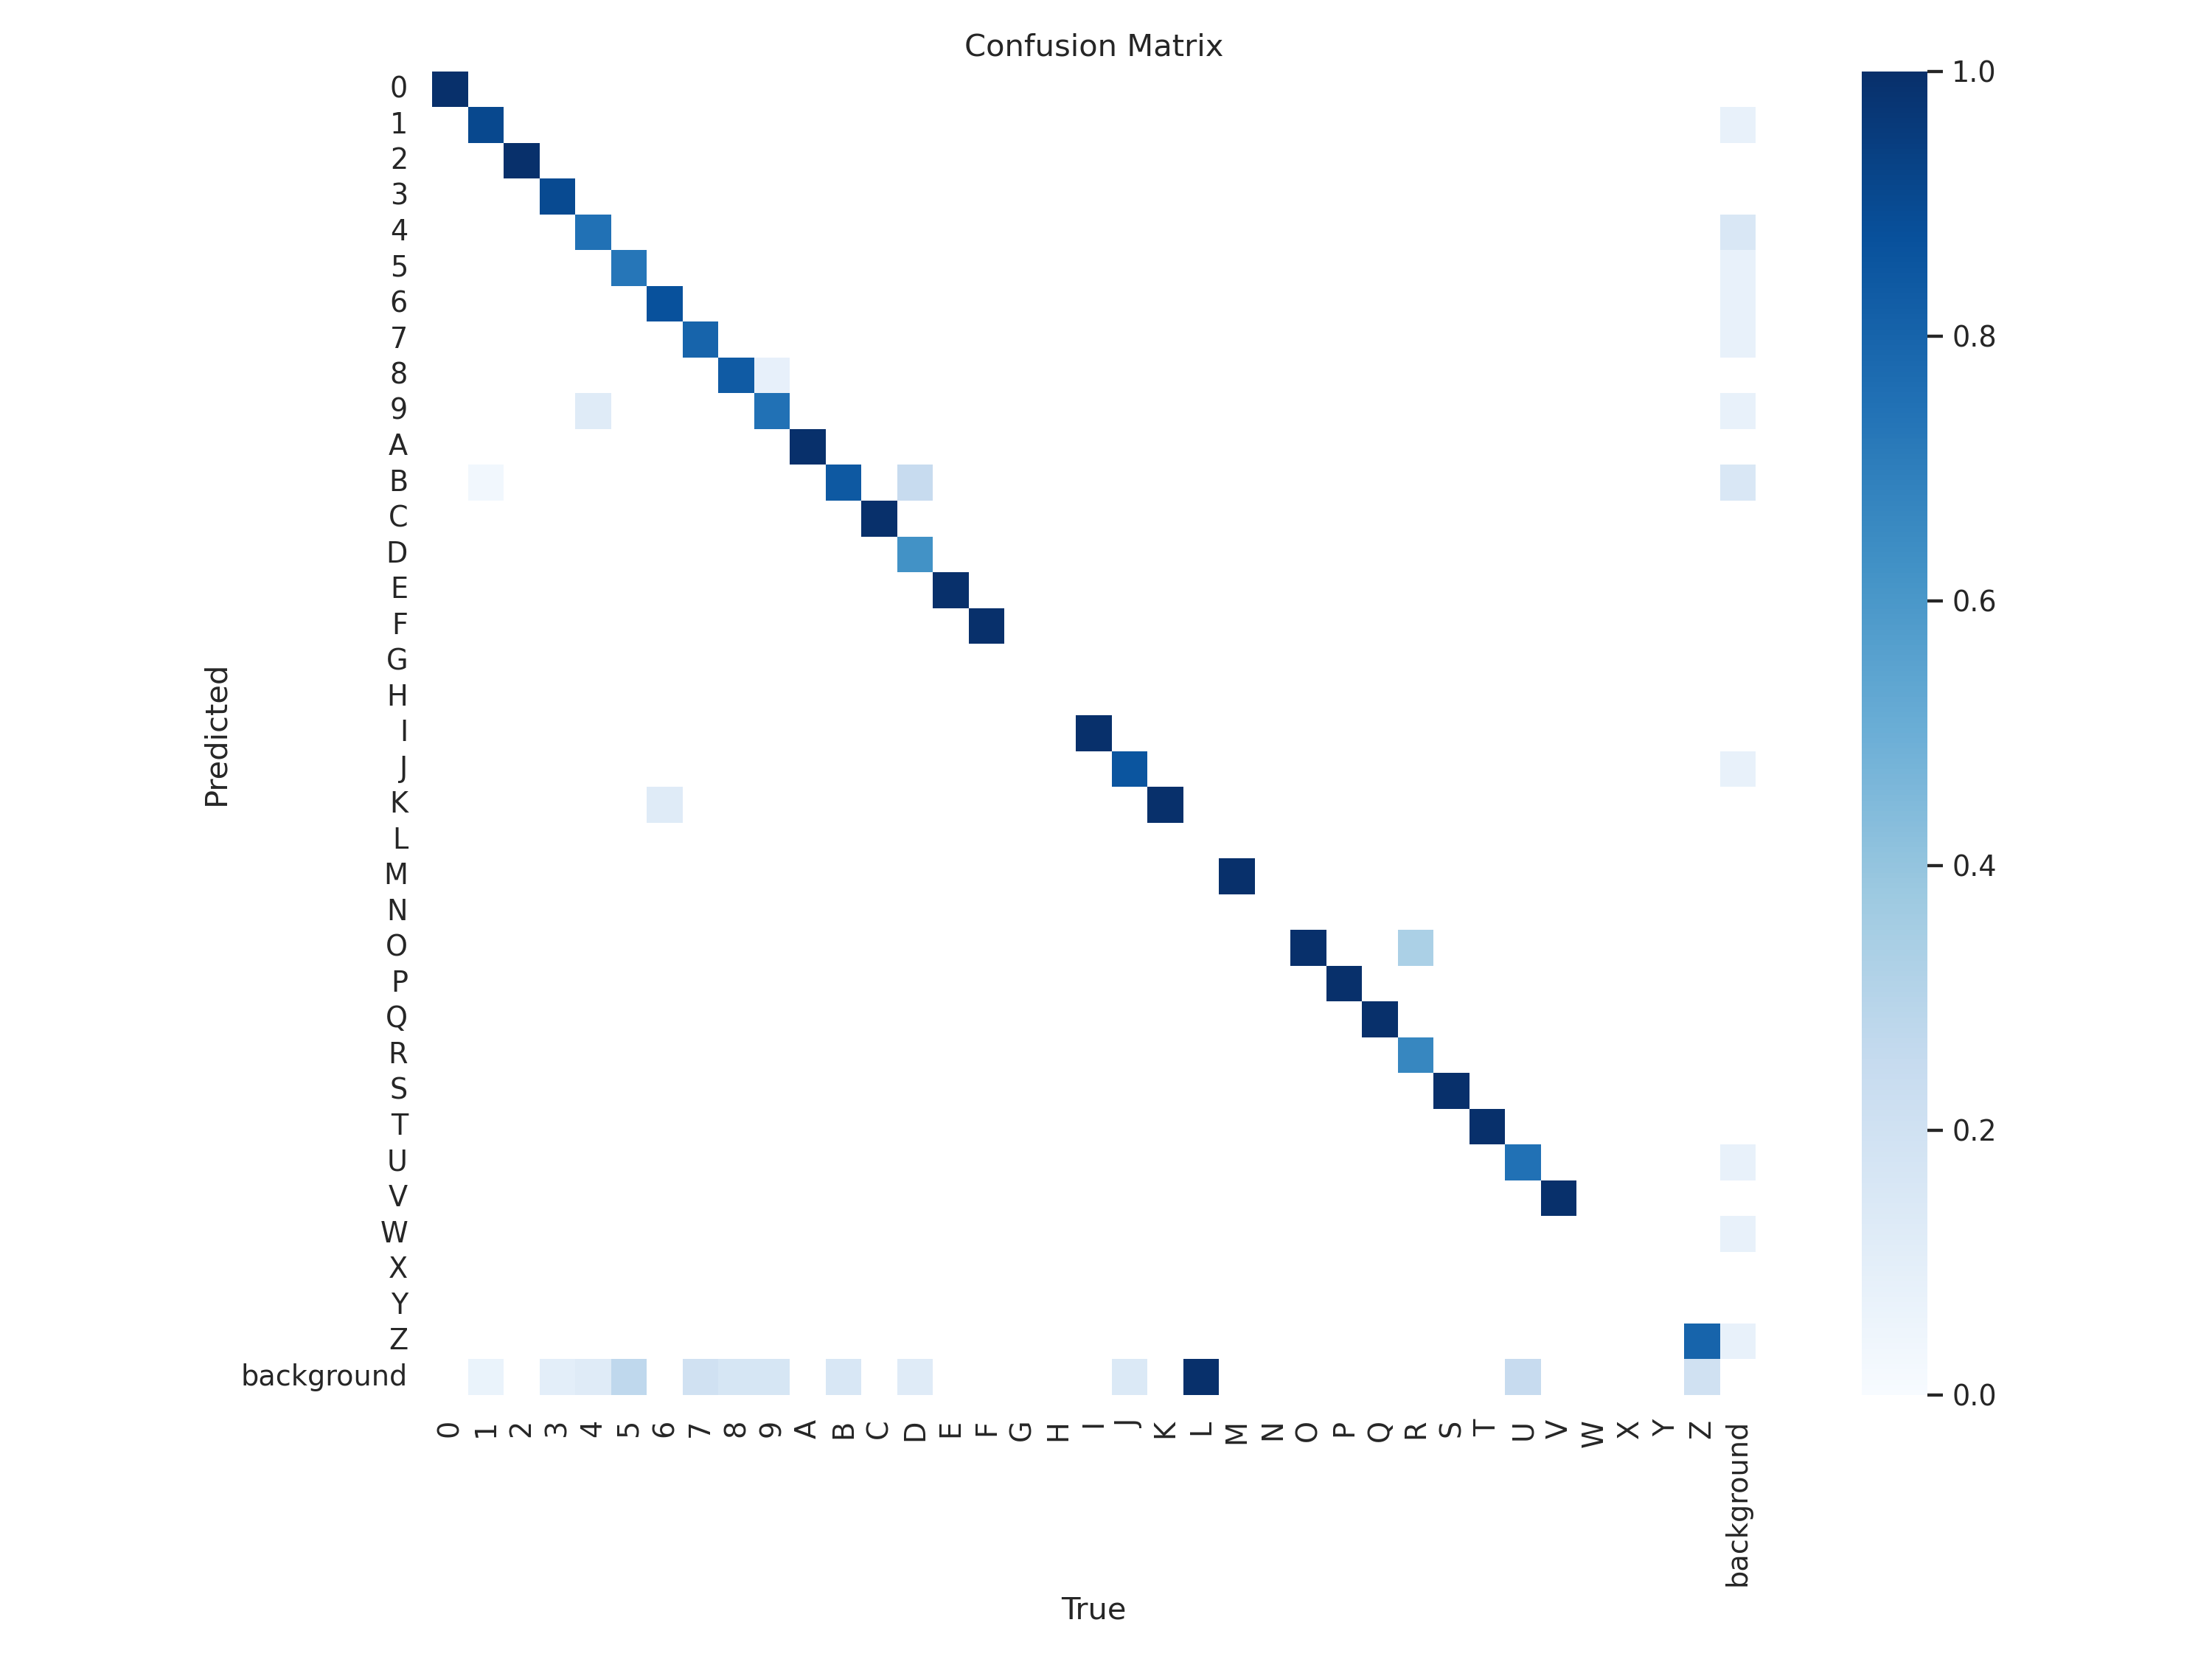

In [15]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


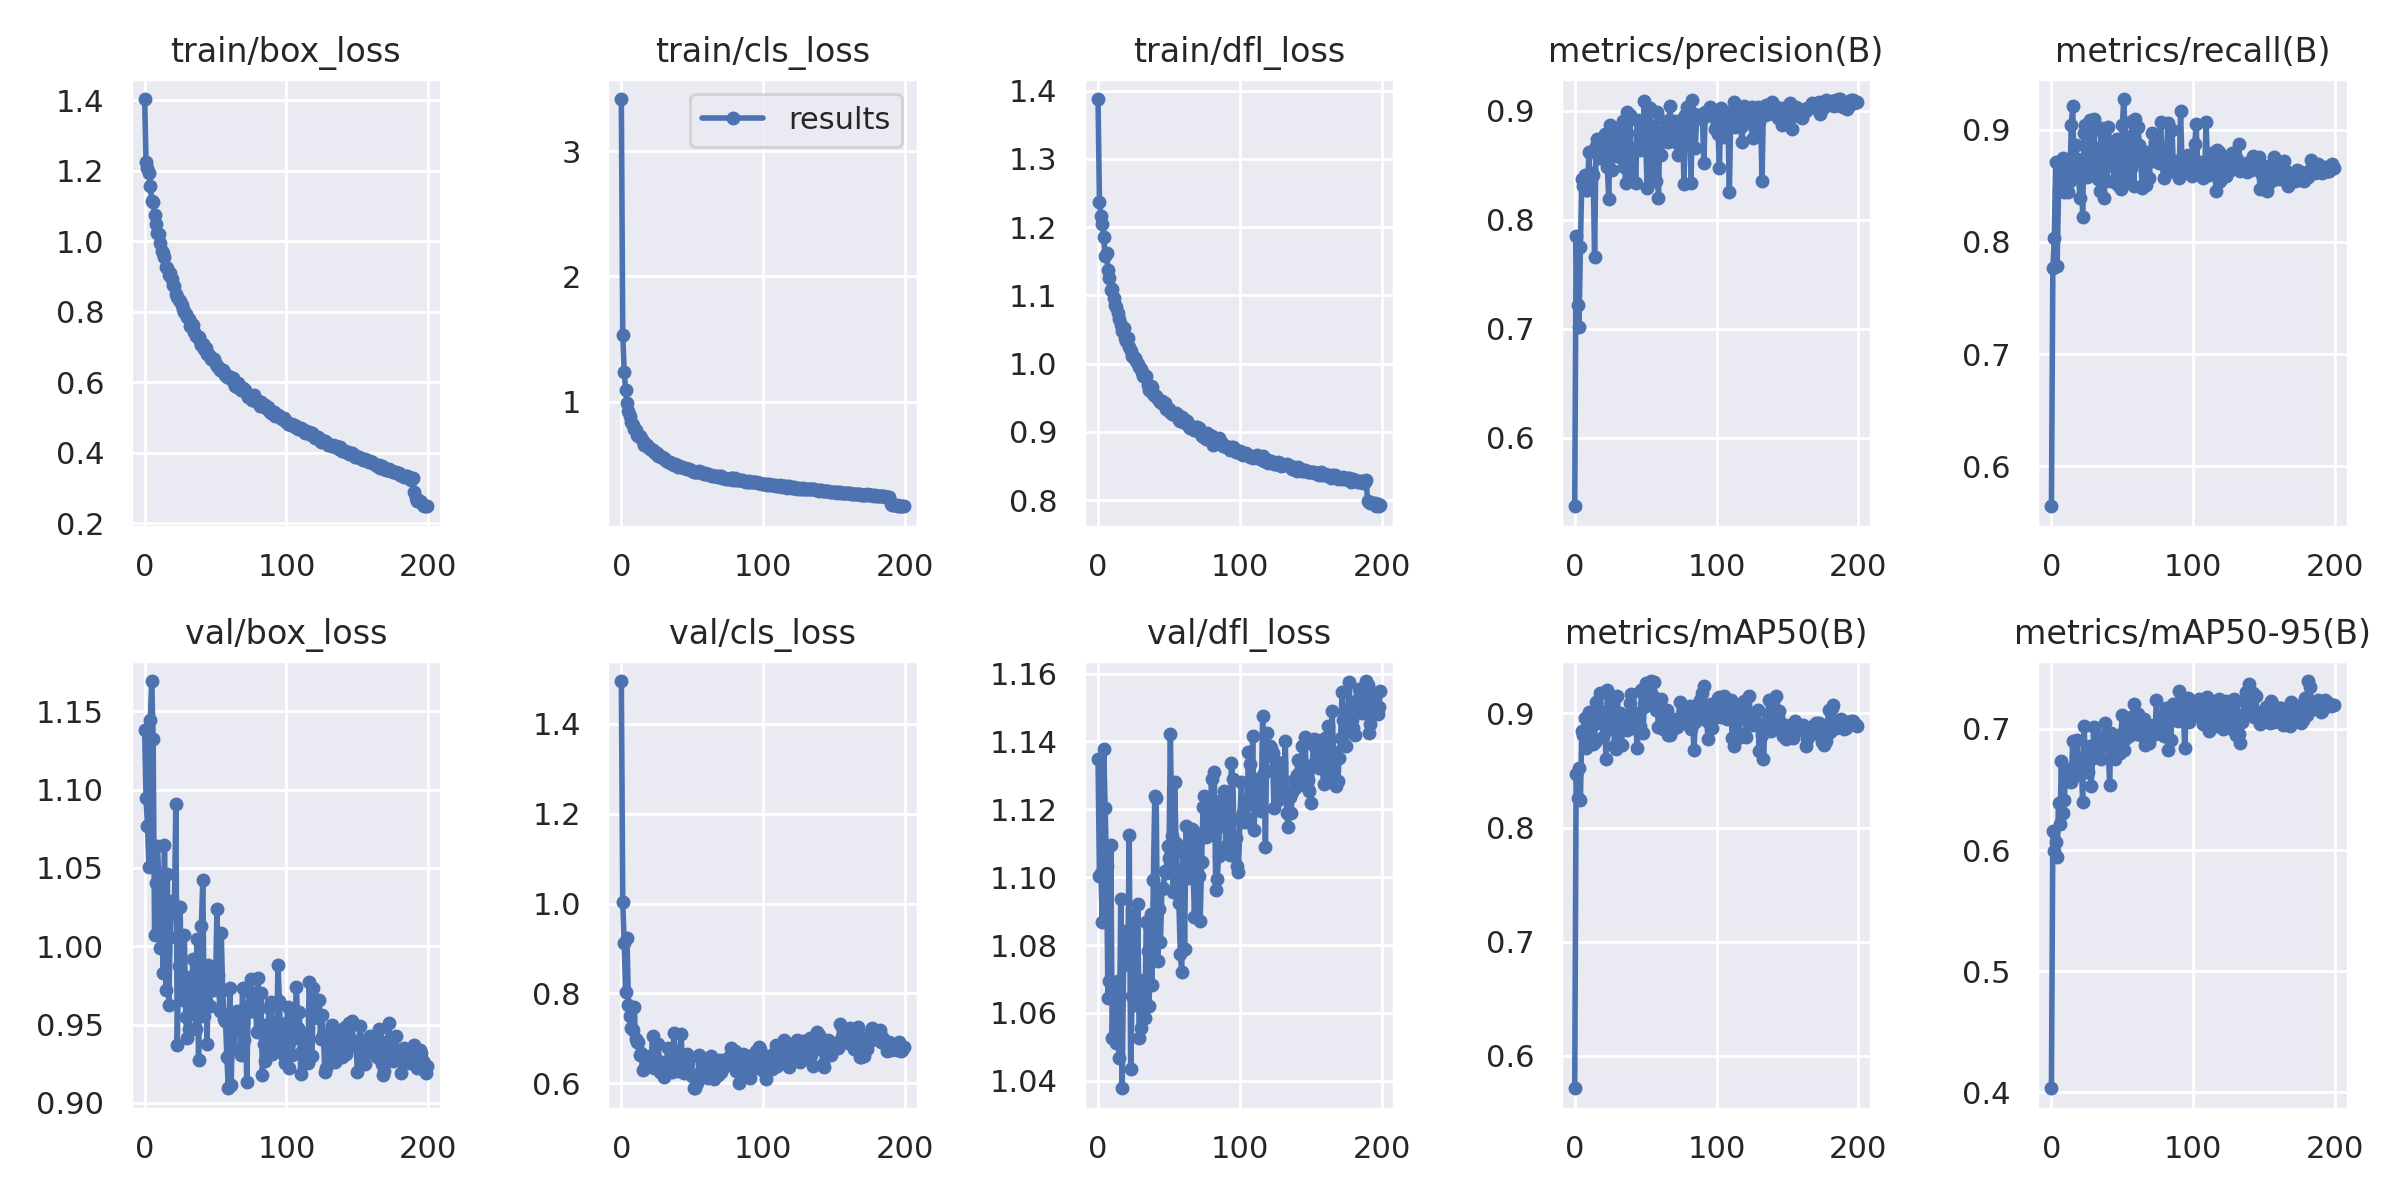

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/kaggle/working


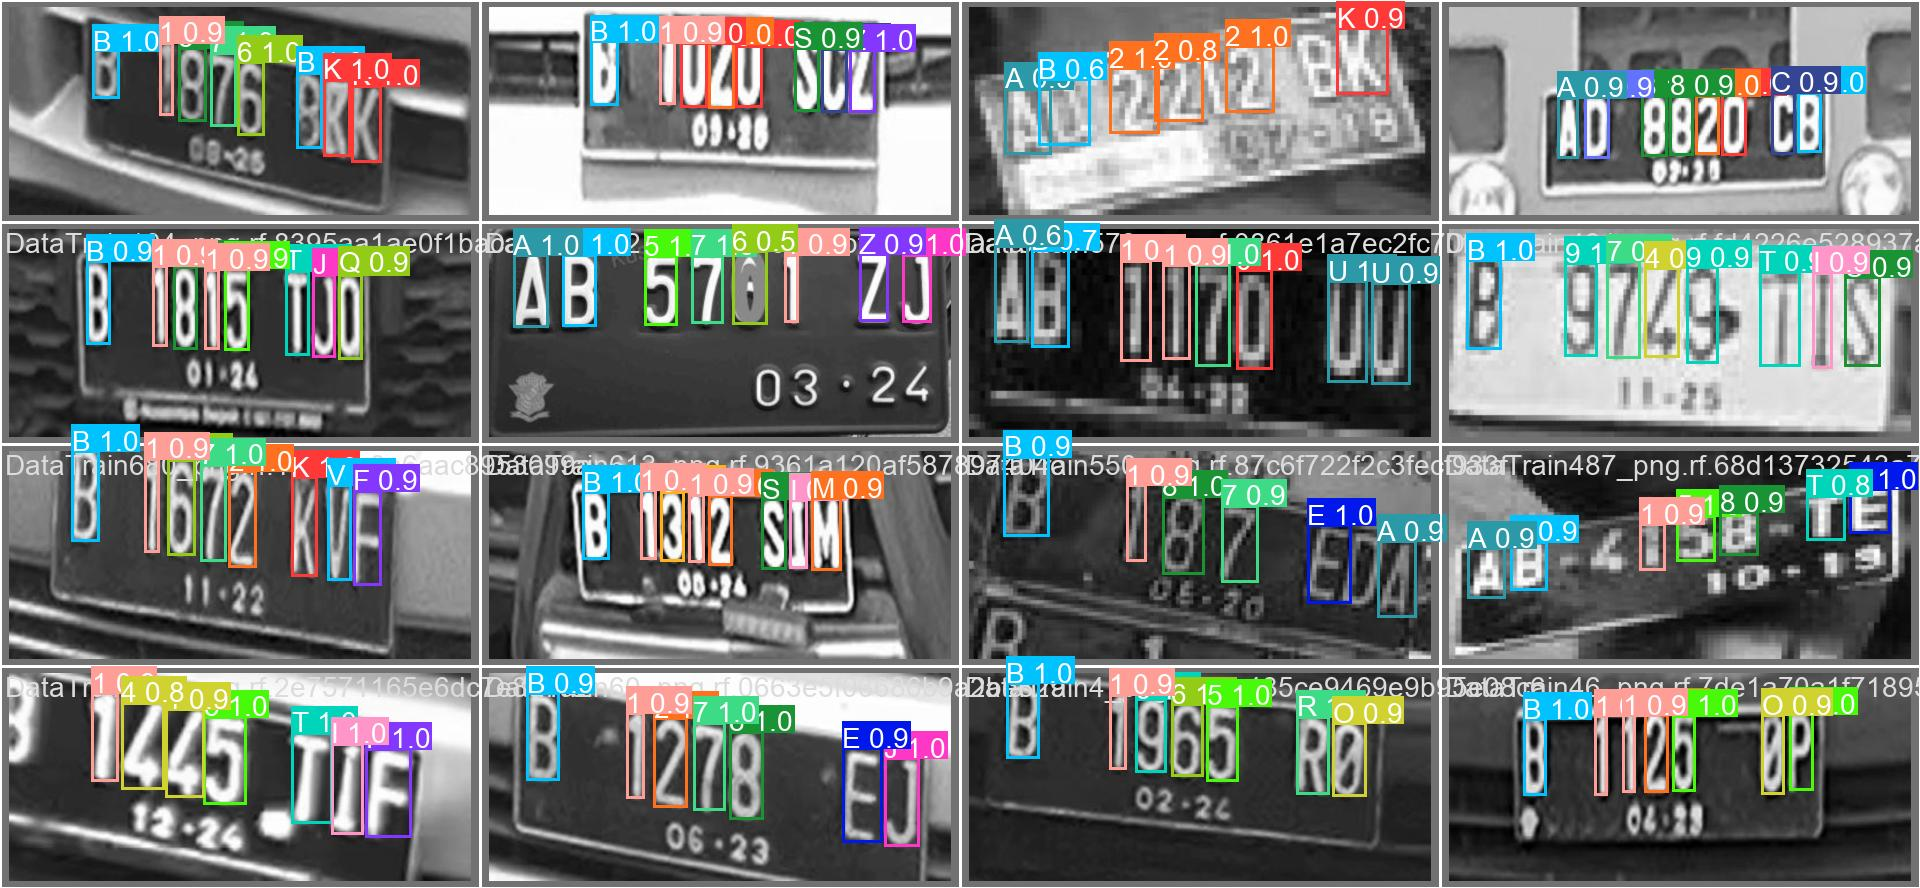

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [18]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symb

## Inference with Custom Model

In [19]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/kaggle/working
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symb

**NOTE:** Let's take a look at few results.

In [20]:
from ultralytics.yolo.engine.model import YOLO

test_path = "/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan"

model = YOLO(f"{HOME}/runs/detect/train/weights/best.pt")
results = model.predict(source=test_path)
names = model.names
labels = []

for r in results:
    # Get bounding boxes and class indices
    boxes = r.boxes.xyxy
    cls = r.boxes.cls
    
    # Sort bounding boxes and class indices by x1 coordinate
    sorted_indices = boxes[:, 0].argsort()
    sorted_boxes = boxes[sorted_indices]
    sorted_cls = cls[sorted_indices]
    
    # Get class names
    file_labels = [names[int(c)] for c in sorted_cls]
    
    # Append labels to list
    labels.append(file_labels)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.10 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 168 layers, 11139516 parameters, 0 gradients, 28.5 GFLOPs


/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest1.png
['A', 'D', '7', '0', '3', '4', 'O', 'E']


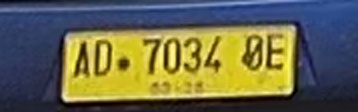



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest10.png
['B', '1', '7', '3', '6', 'B', 'E', 'Y']




/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest100.png
['B', '1', '4', '0', '8', 'R', 'X']


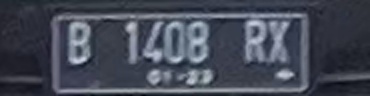



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest11.png
['7', 'B', 'I', 'E']




/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest12.png
['B', '1', '6', '7', '8', 'W', 'Z', 'N', 'M']


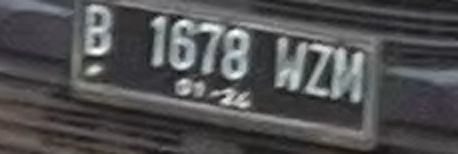



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest13.png
['A', 'D', '9', '3', '1', '3', 'S', 'S']


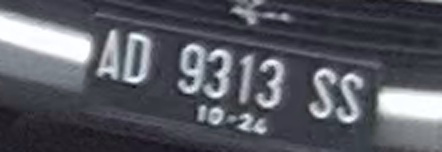



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest14.png
['B', '1', '0', '3', '6', 'U', 'L']


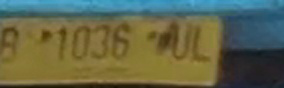



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest15.png
['B', '1', '8', '0', '1', 'T', 'Z', 'S']


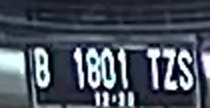



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest16.png
['B', '1', '4', '7', '4', 'T', 'J', 'S']


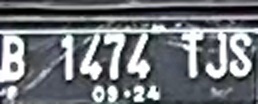



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest17.png
['B', '1', '9', '3', '9', 'P', 'U']


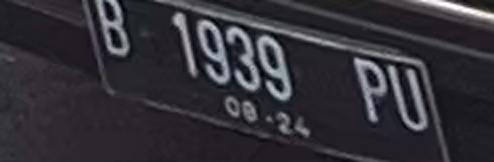



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest18.png
['B', '1', '2', '6', '6', '0', 'T', 'Z', 'T']




/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest19.png
['B', '1', '3', '7', '6', 'T', 'J', 'O']


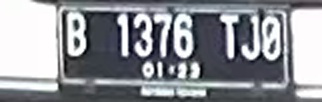



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest2.png
['A', '9', '3', '8', '8', 'E', 'X']


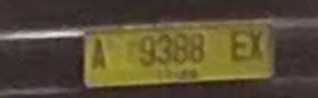



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest20.png
['B', 'Q', 'O']


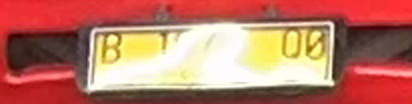



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest21.png
['A', 'B', '3', '3', '2']


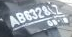



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest22.png
['B', '1', '2', '3', '6', 'P', 'Z']




/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest23.png
['U', 'B', '8', '6', '4', '4', 'P', 'K']


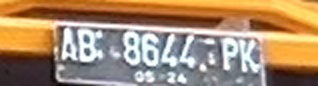



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest24.png
['B', '1', 'J', 'K', 'T']


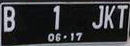



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest25.png
['A', 'A', '7', '0', '8', '4', 'O', 'O']


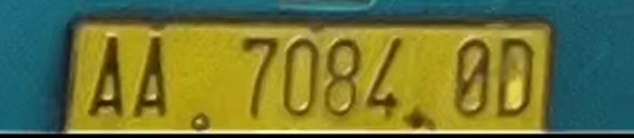



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest26.png
['B', '1', '1', '3', '1', 'E', 'K', 'G']


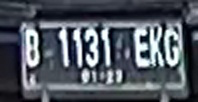



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest27.png
['B', '1', '0', '3', '7']


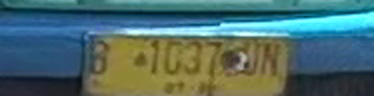



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest28.png
['B', '1', '0', '3', '6', 'U', 'L']


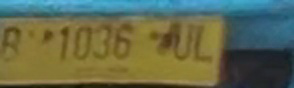



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest29.png
['A', 'C', '8', '9', '2', '0', 'C']


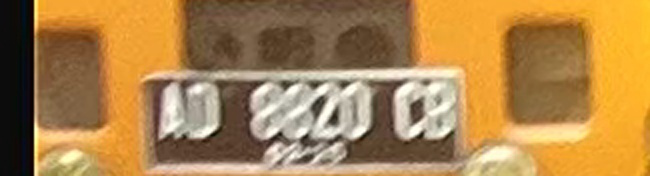



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest3.png
['B', '1', '6', 'T', 'B']


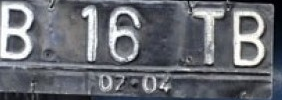



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest30.png
['A', '9', '1', '9', '2', 'Z', 'M']


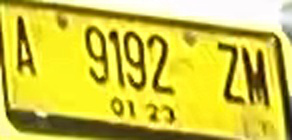



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest31.png
['2', '0']


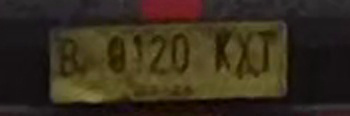



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest32.png
['B', '1', '6', '4', '3', 'T', 'R', 'O']


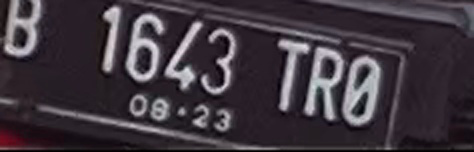



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest33.png
['B', '1', '3', '9', '0', 'T', 'J', 'U']


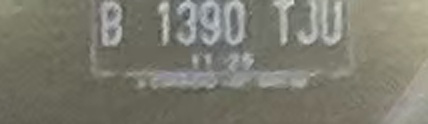



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest34.png
['A', 'B', '2', '8', '1', 'Q']


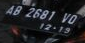



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest35.png
['D', 'B', '1', '8', '6', '0', 'E', 'F']


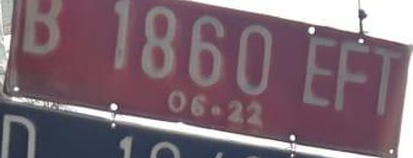



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest36.png
['A', '7', '4', '9', 'F', 'S']


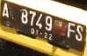



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest37.png
['B', '1', '5', '6', '6', 'F', 'O', 'N']




/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest38.png
['B', '1', '0', '6', '3', 'S', 'J', 'Q']


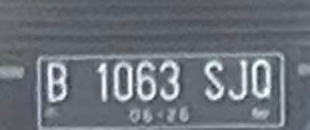



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest39.png
['B', '1', '2', '5', '4', 'T', 'F', 'X']


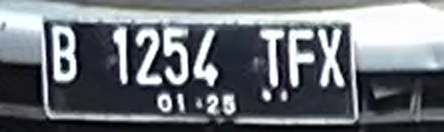



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest4.png
['B', '1', '6', '6', '1', 'T', 'K', 'Z']


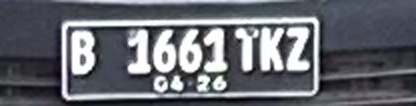



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest40.png
['B', '1', '0', '3', '6', 'J', 'Y']




/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest41.png
['A', 'B', '4', '9', '2', '3', 'U', 'H']


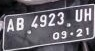



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest42.png
['B', '1', '5', '0', '9', 'U', 'N']


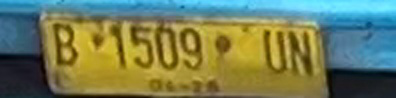



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest43.png
['B', '1', '9', '3', '7', 'T']


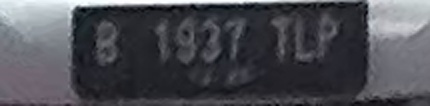



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest44.png
['B', '2', '0', '2', 'U', 'L']


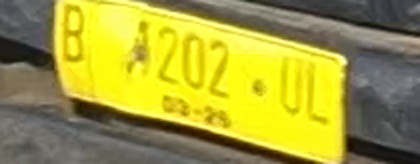



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest45.png
['B', '1', '0', '2', '6', 'T', 'M', 'Z']


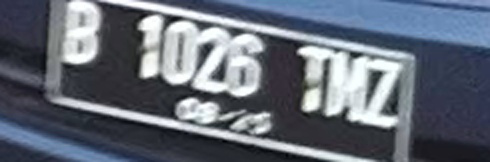



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest46.png
['B', '1', '7', '2', '4', 'P', 'Y', 'W']


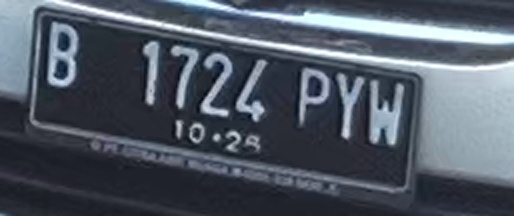



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest47.png
['B', '1', '1', '0', '2', 'S', 'I']


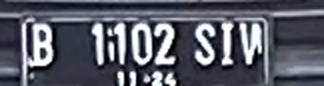



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest48.png
['A', 'D', '7', '0', '3', '4', 'O', 'E']


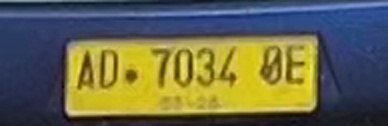



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest49.png
['A', 'B', '4', '3', '5', '2', 'C', 'X']


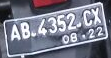



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest5.png
['A', '3', '7', '7', 'B', 'E']


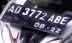



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest50.png
['B', '1', '8', '9', '5', 'E', 'J', 'B']


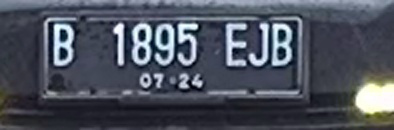



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest51.png
['B', '1', '7', '8', '6', 'U', 'J', 'T']


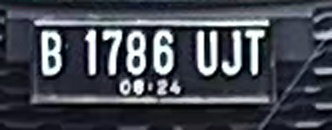



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest52.png
['B', '1', '5', '4', '9', 'R', 'F', 'S']


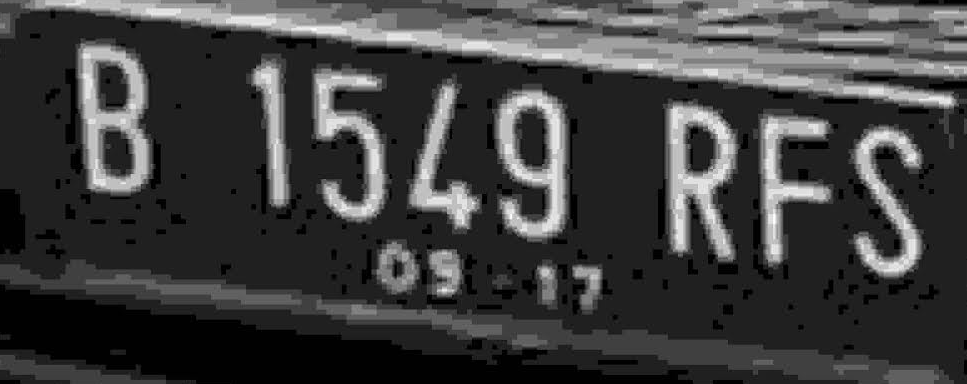



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest53.png
['B', '1', '8', '6', '9', 'E', 'O', 'F']


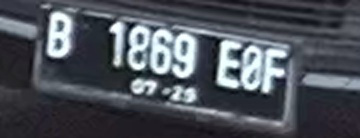



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest54.png
['1', '7', '1', 'X']


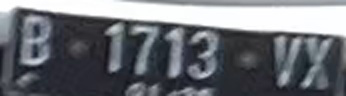



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest55.png
['B', '1', '6', '3', 'S', 'P', 'W']


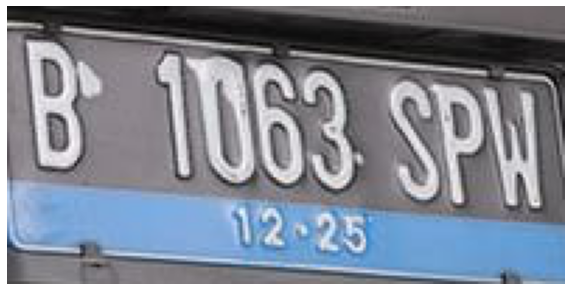



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest56.png
['B', '1', '6', '6', '1', 'T', 'K', 'Z']


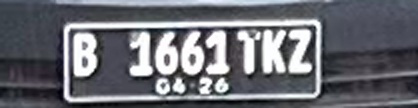



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest57.png
['A', '8', '0', '1', '4', 'V', 'A']


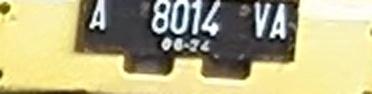



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest58.png
['B', '1', '8', '7', '3']


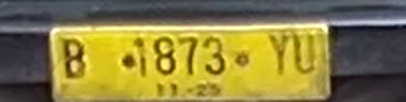



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest59.png
['1', '8', '4', '0']


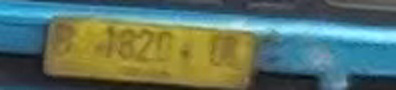



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest6.png
['B', '7', '7']


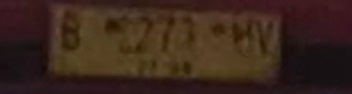



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest60.png
['B', '1', '4', '2', '2', 'B', 'K', 'W', 'K']


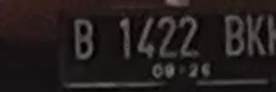



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest61.png
['B', '5', '2', '7', '8', 'X', 'A']


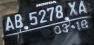



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest62.png
['A', 'D', '4', '1', '8', 'U']


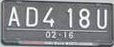



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest63.png
['B', '1', '1', '5', '7', 'Y']


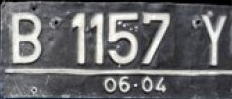



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest64.png
['B', '1', '2', '3', '3', 'R', 'F', 'D']


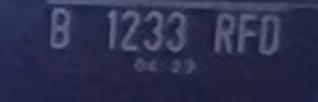



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest65.png
['B', '1', '0', '3', '1', 'N', 'I']


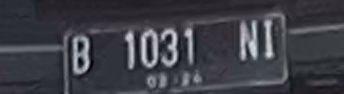



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest66.png
['A', 'D', '9', '9', 'J', 'R']




/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest67.png
['B', '1', '6', '8', '3', 'S', 'E', 'Y']




/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest68.png
['A', 'A', '7', '0', '0', '4', '2', 'Q']


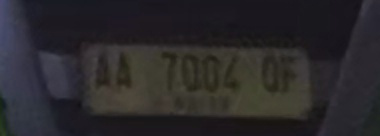



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest69.png
['B', '1', '2', '4', '1', 'S', 'S', 'W']


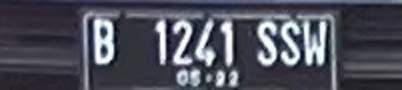



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest7.png
['B', '1', '0', '6', '4', 'T', 'F', 'R']


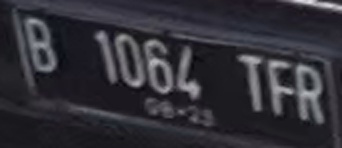



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest70.png
['B', '1', '6', '3', '2', 'T']


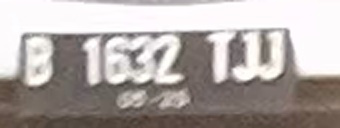



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest71.png
['B', '1', '9', '0', '7', 'E', 'L', 'R']


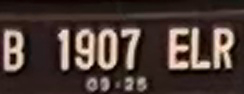



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest72.png
['B', '1', '8', '1', '5', 'T', 'J', 'D']


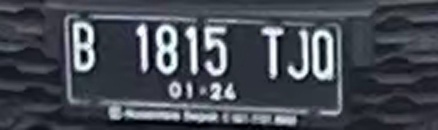



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest73.png
['B', '1', '7', '3', '4', 'U', 'J', '6']


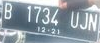



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest74.png
['B', '1', '7', '4', '3', 'E', 'Y', 'F']


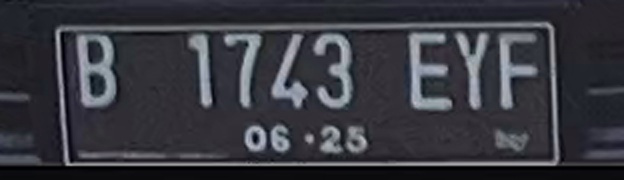



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest75.png
['B', '1', '0', '7', '5', 'Q', 'O']


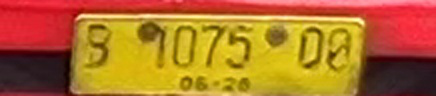



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest76.png
['A', '5', '5', '3', 'N']


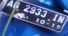



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest77.png
['B', '1', '5', '2', '3', 'T', 'J', 'T']


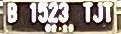



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest78.png
['B', '1', '5', '7', 'L']




/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest79.png
['1', '7', '1', 'X']


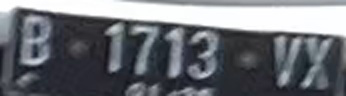



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest8.png
['B', '1', '3', '9', '5', 'T', 'J', 'W']


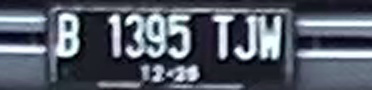



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest80.png
['B', '1', '3', '5', '1', 'T', 'J', 'S']


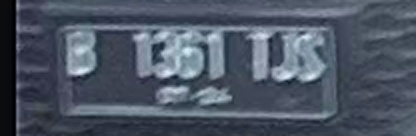



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest81.png
['A', '9', '3', '8', '8', 'E', 'X']


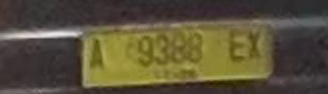



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest82.png
['B', '1', '5', '3', '2', 'N', 'K', 'Y']


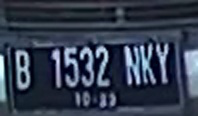



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest83.png
['B', '1']




/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest84.png
['B', '1', '4', '1', '1', 'T', 'V', 'E']


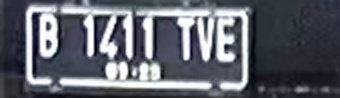



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest85.png
['B', '3', '7', '8', '7', 'X', 'K', 'E']


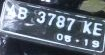



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest86.png
['B', 'R', 'F']




/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest87.png
['B', '1', '9', '0', '3', 'R', 'F', 'D']


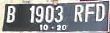



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest88.png
['A', 'B', '2', '9', '5', '8']


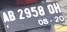



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest89.png
['A', 'D', '4', '1', '8', 'U']


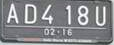



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest9.png
['B', '1', '2', '7', '0', 'R', 'F', 'D']


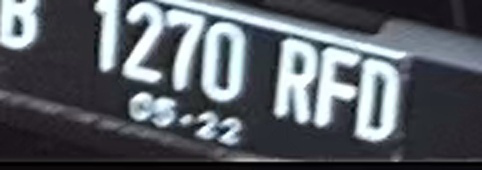



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest90.png
['B', '1', '8', '8', '5', 'T', 'L', 'P']


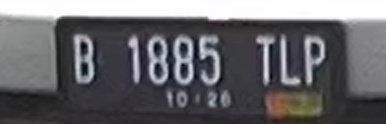



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest91.png
['B', '1', '6', '3', '4', 'S', 'S', 'N']


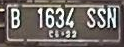



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest92.png
['A', 'B', '3', '5', '1', '1', 'O', 'H']


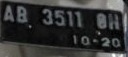



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest93.png
['B', '1', '7', '2', 'U', 'U', 'A']


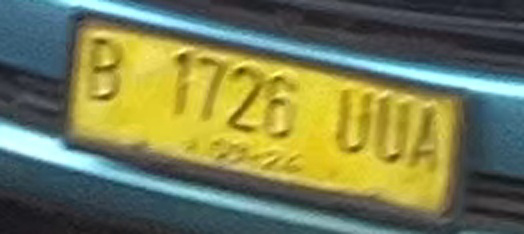



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest94.png
['B', '1', '8', '2', '0', 'T', 'J', 'V']


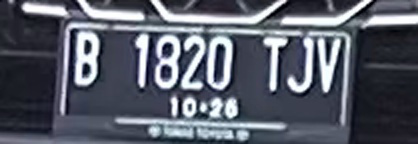



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest95.png
['B', '1', '1', 'U', 'R', 'B']




/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest96.png
['B', '8', '5', 'U']


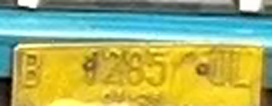



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest97.png
['A', 'B', '8', '6', '4', '4', 'P', 'K']


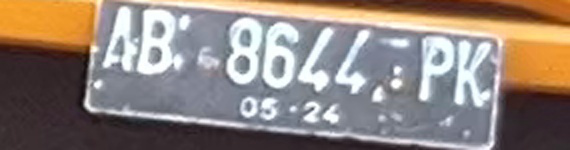



/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest98.png
['A', 'G', '9', '7', '1', '8', 'E', 'G']




/kaggle/input/satria-data-2023-dataset-ocr/Data Test for BDC 2023 - Penyisihan/Data Test for BDC 2023 - Penyisihan/DataTest99.png
['B', '1', '5', '0', '9', 'U', 'N']


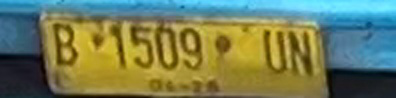

In [21]:
import glob
from IPython.display import Image, display

i = 0
# for image_path in sorted(glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')):
for image_path in sorted(glob.glob(f"{test_path}/*.png")):
    print(image_path)
    print(labels[i])
    display(Image(filename=image_path, width=200))
    print("\n")
    i+=1